# 分位数法


Q1（25%分位数）: 90.23
Q3（75%分位数）: 109.75
IQR（四分位距）: 19.52
下界: 60.95
上界: 139.02
原始数据量: 1006
过滤后数据量: 992
被识别为异常值的数据量: 14


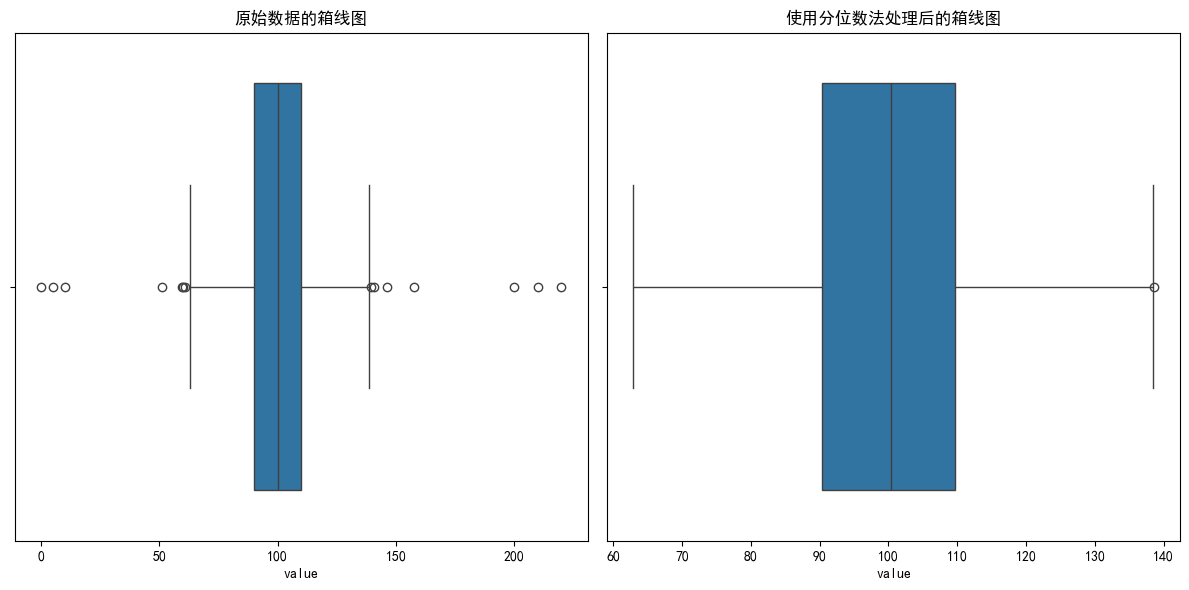

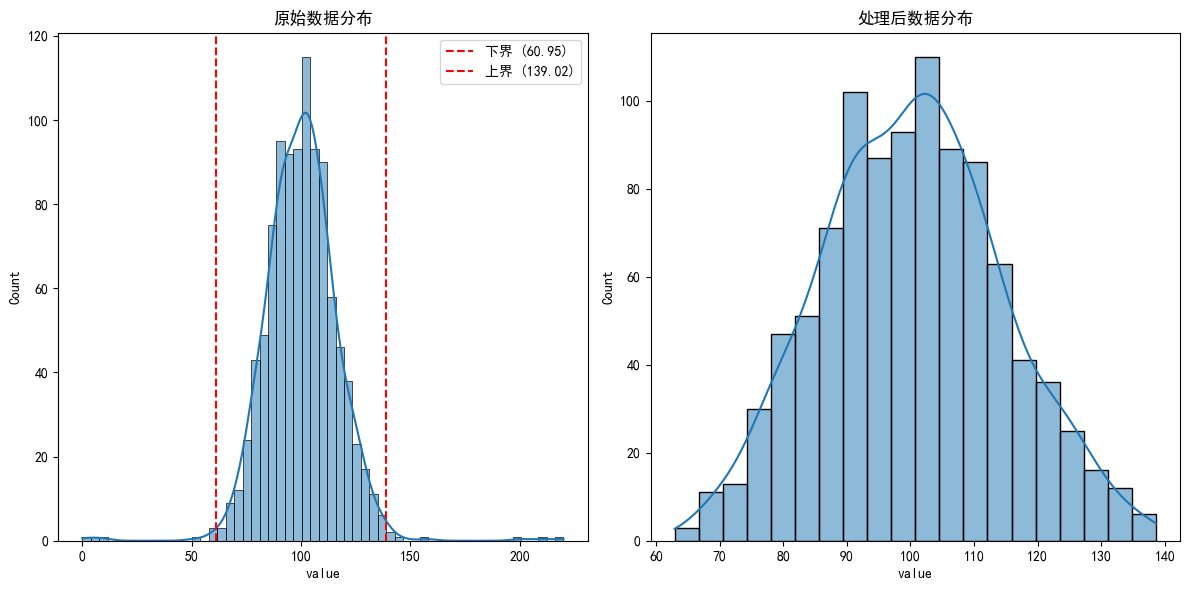

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import font_manager

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 创建一个包含异常值的示例数据集
np.random.seed(42)  # 设置随机种子，确保结果可重现
data = np.random.normal(loc=100, scale=15, size=1000)  # 生成均值为100，标准差为15的正态分布数据
# 添加一些异常值
outliers = np.array([200, 210, 220, 10, 5, 0])  # 手动添加一些明显的异常值
data = np.concatenate([data, outliers])  # 将异常值与正常数据合并

# 转换为DataFrame以便于处理
df = pd.DataFrame({'value': data})  # 将数据转换为DataFrame格式

# 绘制原始数据的箱线图
plt.figure(figsize=(12, 6))  # 设置图形大小
plt.subplot(1, 2, 1)  # 创建1行2列的子图，选择第1个
sns.boxplot(x=df['value'])  # 绘制箱线图
plt.title('原始数据的箱线图')  # 设置标题

# 使用分位数法处理异常值
# 计算Q1（25%分位数）和Q3（75%分位数）
Q1 = df['value'].quantile(0.25)  # 计算第一四分位数（25%）
Q3 = df['value'].quantile(0.75)  # 计算第三四分位数（75%）

# 计算四分位距（IQR）
IQR = Q3 - Q1  # 四分位距 = Q3 - Q1

# 定义异常值的界限
lower_bound = Q1 - 1.5 * IQR  # 下界 = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR  # 上界 = Q3 + 1.5 * IQR

print(f"Q1（25%分位数）: {Q1:.2f}")
print(f"Q3（75%分位数）: {Q3:.2f}")
print(f"IQR（四分位距）: {IQR:.2f}")
print(f"下界: {lower_bound:.2f}")
print(f"上界: {upper_bound:.2f}")

# 筛选出正常值
df_filtered = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]  # 保留在上下界之间的数据

# 查看过滤前后的数据量
print(f"原始数据量: {len(df)}")
print(f"过滤后数据量: {len(df_filtered)}")
print(f"被识别为异常值的数据量: {len(df) - len(df_filtered)}")

# 绘制处理后的箱线图
plt.subplot(1, 2, 2)  # 选择第2个子图
sns.boxplot(x=df_filtered['value'])  # 绘制过滤后数据的箱线图
plt.title('使用分位数法处理后的箱线图')  # 设置标题

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()  # 显示图形

# 绘制原始数据和处理后数据的直方图对比
plt.figure(figsize=(12, 6))  # 创建新的图形
plt.subplot(1, 2, 1)  # 选择第1个子图
sns.histplot(data=df, x='value', kde=True)  # 绘制原始数据的直方图，kde=True表示添加核密度估计曲线
plt.title('原始数据分布')  # 设置标题
plt.axvline(lower_bound, color='r', linestyle='--', label=f'下界 ({lower_bound:.2f})')  # 添加下界线
plt.axvline(upper_bound, color='r', linestyle='--', label=f'上界 ({upper_bound:.2f})')  # 添加上界线
plt.legend()  # 显示图例

plt.subplot(1, 2, 2)  # 选择第2个子图
sns.histplot(x=df_filtered['value'], kde=True)  # 绘制过滤后数据的直方图，修正了data参数的使用方式
plt.title('处理后数据分布')  # 设置标题

plt.tight_layout()  # 自动调整子图参数
plt.show()  # 显示图形


# Z-score 经过标准化后的绝对值大于了某个阈值，就是异常值

总样本数: 300
被识别为异常值的样本数: 3
异常值占比: 1.00%


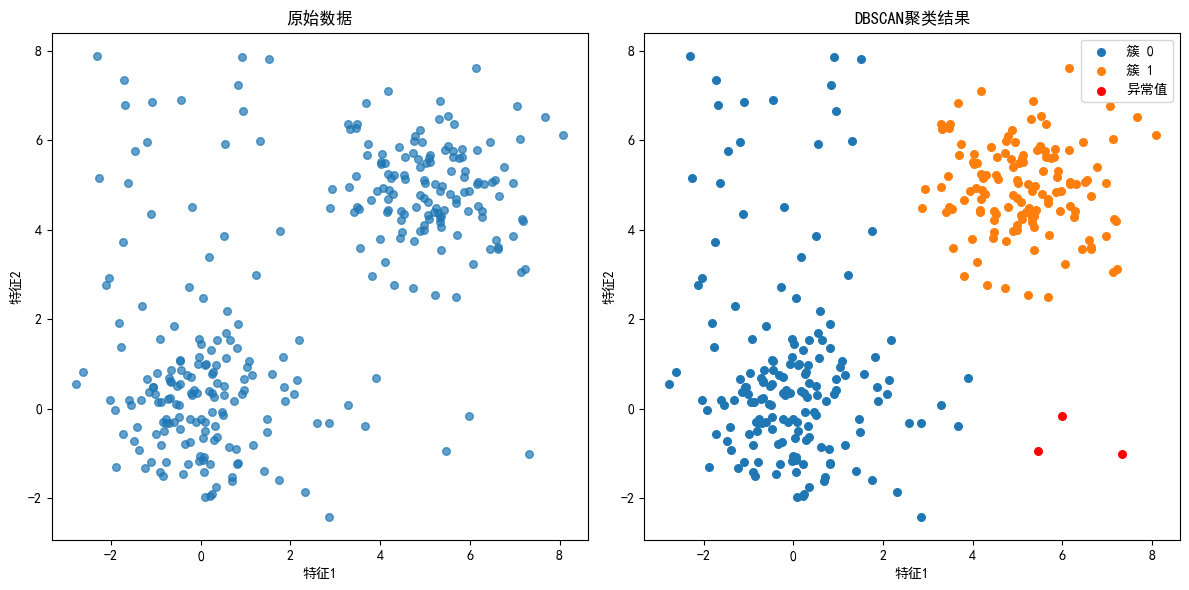

过滤后的数据量: 297


'\nDBSCAN密度聚类处理异常值的优点：\n1. 不需要预先指定聚类数量\n2. 能够发现任意形状的聚类\n3. 对噪声（异常值）有很强的鲁棒性\n4. 只需要两个参数：eps和min_samples\n\nDBSCAN密度聚类处理异常值的缺点：\n1. 对参数敏感，不同的eps和min_samples可能导致完全不同的结果\n2. 当数据密度不均匀时，可能难以选择合适的参数\n3. 对高维数据效果可能不佳（维度灾难）\n4. 计算复杂度较高，对大规模数据集可能较慢\n'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 创建一个包含异常值的示例数据集
np.random.seed(42)  # 设置随机种子，确保结果可重现
n_samples = 300  # 样本总数

# 生成正常数据（两个高斯分布）
normal_data1 = np.random.normal(0, 1, (int(n_samples*0.4), 2))  # 第一个正常簇
normal_data2 = np.random.normal(5, 1, (int(n_samples*0.4), 2))  # 第二个正常簇
normal_data = np.vstack([normal_data1, normal_data2])

# 生成异常值（随机分散点）
outliers = np.random.uniform(-3, 8, (int(n_samples*0.2), 2))  # 20%的数据为异常值

# 合并数据
X = np.vstack([normal_data, outliers])
df = pd.DataFrame(X, columns=['feature1', 'feature2'])

# 数据标准化（对DBSCAN很重要，因为它基于距离计算）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 应用DBSCAN算法
# eps: 邻域半径，决定了什么样的点被视为邻居
# min_samples: 形成核心点所需的最小样本数
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# 将聚类结果添加到数据框中
df['cluster'] = clusters

# -1表示异常值（噪声点）
outliers_mask = (clusters == -1)
df['is_outlier'] = outliers_mask

# 打印结果统计
print(f"总样本数: {len(df)}")
print(f"被识别为异常值的样本数: {sum(outliers_mask)}")
print(f"异常值占比: {sum(outliers_mask)/len(df)*100:.2f}%")

# 可视化结果
plt.figure(figsize=(12, 6))

# 原始数据散点图
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.7)
plt.title('原始数据')
plt.xlabel('特征1')
plt.ylabel('特征2')

# DBSCAN聚类结果
plt.subplot(1, 2, 2)
# 绘制正常点（按聚类着色）
for cluster_id in set(clusters):
    if cluster_id != -1:  # 不是异常值
        mask = (clusters == cluster_id)
        plt.scatter(X[mask, 0], X[mask, 1], s=30, label=f'簇 {cluster_id}')

# 绘制异常值（红色）
plt.scatter(X[outliers_mask, 0], X[outliers_mask, 1], s=30, c='red', label='异常值')
plt.title('DBSCAN聚类结果')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.legend()

plt.tight_layout()
plt.show()

# 移除异常值后的数据
df_filtered = df[~df['is_outlier']]
print(f"过滤后的数据量: {len(df_filtered)}")

# DBSCAN异常值检测的优缺点说明
"""
DBSCAN密度聚类处理异常值的优点：
1. 不需要预先指定聚类数量
2. 能够发现任意形状的聚类
3. 对噪声（异常值）有很强的鲁棒性
4. 只需要两个参数：eps和min_samples

DBSCAN密度聚类处理异常值的缺点：
1. 对参数敏感，不同的eps和min_samples可能导致完全不同的结果
2. 当数据密度不均匀时，可能难以选择合适的参数
3. 对高维数据效果可能不佳（维度灾难）
4. 计算复杂度较高，对大规模数据集可能较慢
"""


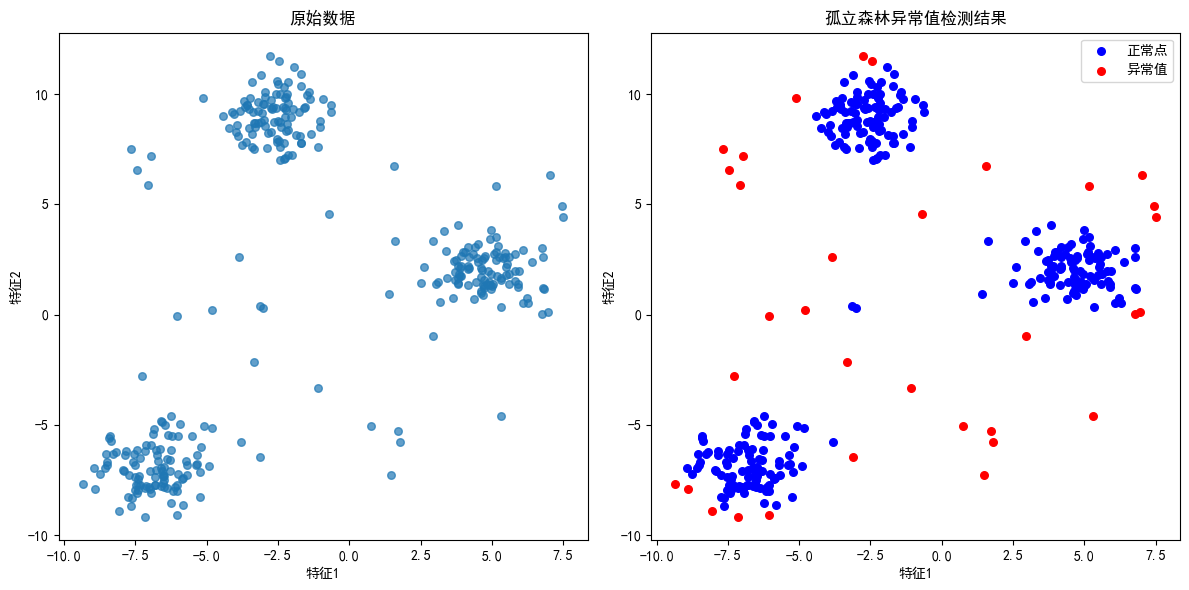

过滤后的数据量: 297


'\n孤立森林处理异常值的优点：\n1. 计算效率高，适用于大规模数据集\n2. 不需要假设数据分布\n3. 对高维数据也有良好的表现\n4. 不需要距离或密度度量，避免了维度灾难问题\n5. 可以处理混合类型的特征\n\n孤立森林处理异常值的缺点：\n1. 对contamination参数敏感，需要预先估计异常值比例\n2. 在某些情况下可能不如基于密度的方法准确\n3. 随机性可能导致结果不稳定，需要设置合适的n_estimators\n4. 对于非常小的数据集效果可能不佳\n'

In [6]:
# 4. 孤立森林(Isolation Forest)异常值检测
# 孤立森林是一种基于树的集成方法，专门用于异常值检测
# 其基本原理是：异常值更容易被"孤立"出来

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

# 生成示例数据
# 创建一个包含正常点和少量异常点的数据集
X_normal, _ = make_blobs(n_samples=300, centers=3, random_state=42)
# 添加一些随机的异常点
rng = np.random.RandomState(42)
X_outliers = rng.uniform(low=-8, high=8, size=(30, 2))
X = np.vstack([X_normal, X_outliers])

# 创建DataFrame
df = pd.DataFrame(X, columns=['特征1', '特征2'])

# 应用孤立森林算法
# contamination参数表示预期的异常值比例
clf = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
# 拟合模型
clf.fit(X)
# 预测结果：1表示正常点，-1表示异常点
y_pred = clf.predict(X)
# 计算异常分数（越负表示越可能是异常值）
scores = clf.decision_function(X)

# 将结果添加到DataFrame
df['is_outlier'] = y_pred == -1
df['anomaly_score'] = scores

# 可视化结果
plt.figure(figsize=(12, 6))

# 原始数据散点图
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], s=30, alpha=0.7)
plt.title('原始数据')
plt.xlabel('特征1')
plt.ylabel('特征2')

# 孤立森林检测结果
plt.subplot(1, 2, 2)
# 绘制正常点（蓝色）
normal_mask = ~df['is_outlier']
plt.scatter(df.loc[normal_mask, '特征1'], df.loc[normal_mask, '特征2'], 
            s=30, c='blue', label='正常点')
# 绘制异常值（红色）
outlier_mask = df['is_outlier']
plt.scatter(df.loc[outlier_mask, '特征1'], df.loc[outlier_mask, '特征2'], 
            s=30, c='red', label='异常值')
plt.title('孤立森林异常值检测结果')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.legend()

plt.tight_layout()
plt.show()

# 移除异常值后的数据
df_filtered = df[~df['is_outlier']]
print(f"过滤后的数据量: {len(df_filtered)}")

# 孤立森林异常值检测的优缺点说明
"""
孤立森林处理异常值的优点：
1. 计算效率高，适用于大规模数据集
2. 不需要假设数据分布
3. 对高维数据也有良好的表现
4. 不需要距离或密度度量，避免了维度灾难问题
5. 可以处理混合类型的特征

孤立森林处理异常值的缺点：
1. 对contamination参数敏感，需要预先估计异常值比例
2. 在某些情况下可能不如基于密度的方法准确
3. 随机性可能导致结果不稳定，需要设置合适的n_estimators
4. 对于非常小的数据集效果可能不佳
"""

